In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
nyc_airlines = pd.read_csv('dataset/nyc_airlines.csv')
nyc_airports = pd.read_csv('dataset/nyc_airports.csv')
nyc_flights_fixed = pd.read_csv('dataset/nyc_flights_fixed.csv')
nyc_planes = pd.read_csv('dataset/nyc_planes.csv')
nyc_weather = pd.read_csv('dataset/nyc_weather.csv')

Determine the number of distinct destinations connected to the airport. EWR

In [7]:
ewr_flights = nyc_flights_fixed[(nyc_flights_fixed.dest == 'EWR') | (nyc_flights_fixed.origin == 'EWR')]

In [14]:
len(set(ewr_flights.origin).union(set(ewr_flights.dest))) - 1

82

Create a ranking of airlines based on the number of flights they operate.

In [20]:
nyc_flights_fixed.groupby(['carrier'])[['flight']].count().sort_values('flight', ascending=False)\
.merge(nyc_airlines, on='carrier')

,carrier,flight,name
0,UA,55802,United Air Lines Inc.
1,EV,54173,ExpressJet Airlines Inc.
2,B6,50194,JetBlue Airways
3,DL,46669,Delta Air Lines Inc.
4,US,19837,US Airways Inc.
5,9E,17416,Endeavor Air Inc.
6,WN,12237,Southwest Airlines Co.
7,AA,10090,American Airlines Inc.
8,VX,5162,Virgin America
9,FL,3073,AirTran Airways Corporation


Cumulative sum of the departure delay

In [26]:
monthly_delay = nyc_flights_fixed[nyc_flights_fixed.dep_delay > 0].groupby(['year', 'month'], as_index=False)[['dep_delay']].sum()

In [39]:
monthly_delay_cum = monthly_delay.copy()

monthly_delay_cum['dep_delay']= monthly_delay_cum.dep_delay.cumsum()

In [56]:
monthly_delay_cum['month'] = monthly_delay_cum['month'].astype('str')
monthly_delay['month'] = monthly_delay['month'].astype('str')

C:\Users\mlope\AppData\Local\Temp\ipykernel_25000\1862153129.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


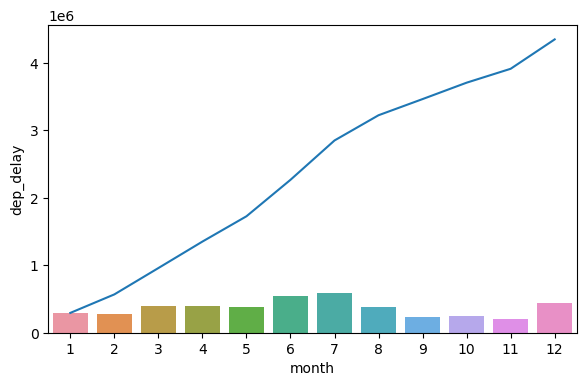

In [57]:
f, ax = plt.subplots(1, 1, figsize=(15,4))
plt.subplot(121)
sns.lineplot(data=monthly_delay_cum, x='month', y='dep_delay')
sns.barplot(data=monthly_delay, x='month', y='dep_delay')
plt.show()